implementing perceptron

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import numpy as np

In [ ]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

implementing MLPs with Keras

In [ ]:
!python3 -m pip install -U tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 882.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 28.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
tf.__version__
keras.__version__

'3.4.1'

**Building an Image Classifier Using the Sequential API**
1.   load a MNIST dataset.



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

to train the neural network using Gradient Descent, we must scale the input features.

In [ ]:
""" X_train_full[:5000] selects elements from the beginning (index 0) up to, but not including, index 5000 in X_train_full. This becomes the new X_valid (validation set).
X_train_full[5000:] selects elements from index 5000 (inclusive) to the end of X_train_full. This becomes the new X_train (training set).Similarly goes for y_train """
X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

Creating the model using the Sequential API

In [ ]:
# model = Sequential() # model = keras.models.Sequential()
# model.add(Flatten(input_shape=[28, 28])) # model.add(InputLayer(input_shape=[28, 28]))
# model.add(Dense(300, activation="relu"))
# model.add(Dense(100, activation="relu"))
# model.add(Dense(10, activation="softmax"))

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

model’s list of layers

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

*   Dense layer initialized the connection weights randomly
*   the biases were initialized to
zeros



In [ ]:
weights , biases = hidden1.get_weights()
print("weights",weights)
print("weights.shape",weights.shape)
print("biases",biases)
print("biases.shape",biases.shape)

weights [[ 0.03049818 -0.02265521  0.03403477 ...  0.06061174 -0.06781151
  -0.00139971]
 [ 0.03084205  0.06089984 -0.05365122 ...  0.01503664  0.05427723
   0.07105468]
 [ 0.04103582  0.04444619 -0.07392898 ...  0.05868368 -0.07238892
  -0.06352513]
 ...
 [-0.03604437  0.04577033  0.00338317 ...  0.07252927 -0.0118183
   0.03762254]
 [ 0.07225333 -0.02997651 -0.02539371 ...  0.07368086 -0.04153129
  -0.02077546]
 [ 0.06856908 -0.02719089  0.01586875 ...  0.02105748  0.03612003
   0.01073836]]
weights.shape (784, 300)
biases [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

Compiling model to set loss , optimizer and other useful metrics  

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

Training and evaluating the model

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6848 - loss: 0.9918 - val_accuracy: 0.7958 - val_loss: 0.5856
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8277 - loss: 0.5024 - val_accuracy: 0.8482 - val_loss: 0.4450
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8435 - loss: 0.4519 - val_accuracy: 0.8604 - val_loss: 0.4066
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8540 - loss: 0.4140 - val_accuracy: 0.8546 - val_loss: 0.3996
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8591 - loss: 0.4002 - val_accuracy: 0.8642 - val_loss: 0.3833
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8677 - loss: 0.3723 - val_accuracy: 0.8670 - val_loss: 0.3791
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8689 - loss: 0.3710 - val_accuracy: 0.8668 - val_loss: 0.3802
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8727 - loss: 0.3593

We pass it the input features (X_train) and the target classes (y_train), as well as the
number of epochs to train (or else it would default to just 1, which would definitely
not be enough to converge to a good solution). We also pass a validation set (this is
optional).

If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set

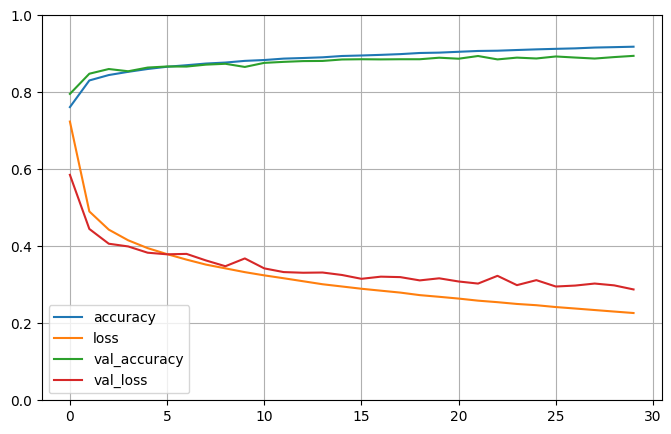

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

You can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease.
Good! Moreover, the validation curves are close to the training curves, which means
that there is not too much overfitting.

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8571 - loss: 57.6473


[60.0906867980957, 0.8521999716758728]

it is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set

Using the model to make predictions

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict_classes() method instead:

In [ ]:
# y_pred = model.predict_classes(X_new)
# y_pred
predict=model.predict(X_new)
predict_classes=np.argmax(predict,axis=1)
print("predict_classes",predict_classes)
np.array(class_names)[predict_classes]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predict_classes [9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

**Building a Regression MLP Using the Sequential API**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - RootMeanSquaredError: 1.2054 - loss: 1.5588 - val_RootMeanSquaredError: 0.6325 - val_loss: 0.4001
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6424 - loss: 0.4132 - val_RootMeanSquaredError: 0.6660 - val_loss: 0.4436
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6107 - loss: 0.3733 - val_RootMeanSquaredError: 0.6166 - val_loss: 0.3802
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6002 - loss: 0.3605 - val_RootMeanSquaredError: 0.7641 - val_loss: 0.5838
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5844 - loss: 0.3418 - val_RootMeanSquaredError: 0.8964 - val_loss: 0.8035
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5763 - loss: 0.3323 - val_RootMeanSquaredError: 1.0824 - val_loss: 1.1716
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5666 - loss: 0.3212 -

In [ ]:
rmse_test

0.5408520102500916

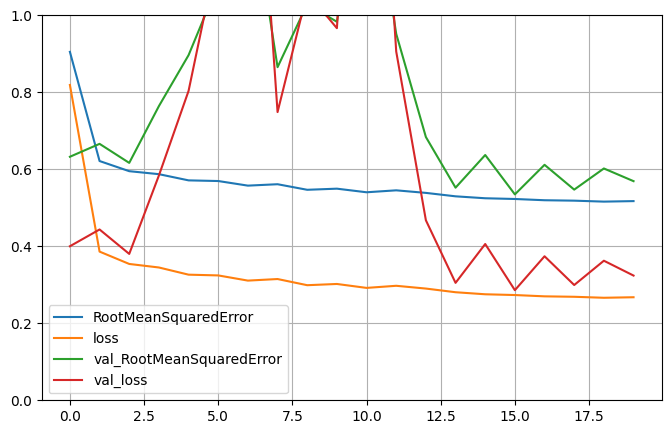

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Building Complex Models Using the Functional API**

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0033 - loss: 0.4845 - val_accuracy: 0.0010 - val_loss: 0.5169
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0032 - loss: 0.4564 - val_accuracy: 0.0010 - val_loss: 0.4022
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0039 - loss: 0.4173 - val_accuracy: 0.0010 - val_loss: 0.4013
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0041 - loss: 0.4131 - val_accuracy: 0.0010 - val_loss: 0.3946
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0035 - loss: 0.4294 - val_accuracy: 0.0010 - val_loss: 0.3774
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0032 - loss: 0.4054 - val_accuracy: 0.0010 - val_loss: 0.3742
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0032 - loss: 0.4164 - val_accuracy: 0.0010 - val_loss: 0.3826
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0034 - loss: 0.3804 - val_accuracy: 0.

**Using the Subclassing API to Build Dynamic Models**

Both the **Sequential API and the Functional API** are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors.

Simply subclass the Model class, create the layers you need in the constructor, and use
them to perform the computations you want in the call() method. For example, creating an instance of the following WideAndDeepModel class gives us an equivalent
model to the one we just built with the Functional API. You can then compile it, evaluate it, and use it to make predictions, exactly like we just did:

In [ ]:
class WideAndDeepModel(keras.Model):
def __init__(self, units=30, activation="relu", **kwargs):
super().__init__(**kwargs) # handles standard args (e.g., name)
self.hidden1 = keras.layers.Dense(units, activation=activation)
self.hidden2 = keras.layers.Dense(units, activation=activation)
self.main_output = keras.layers.Dense(1)
self.aux_output = keras.layers.Dense(1)
def call(self, inputs):
input_A, input_B = inputs
hidden1 = self.hidden1(input_B)
hidden2 = self.hidden2(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
main_output = self.main_output(concat)
aux_output = self.aux_output(hidden2)
return main_output, aux_output
model = WideAndDeepModel()

Saving and Restoring a Model

In [ ]:
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")